In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
%matplotlib inline
from matplotlib.cm import get_cmap


In [32]:
def get_content(article_name):
  url_api = f'https://en.wikipedia.org/w/api.php'
  param = {
        "action": "query",
        "format": "json",
        "prop": "extracts",
        "exintro": True,
        "explaintext": True,
        "titles": article_name
    }
  response = requests.get(url_api, param)
  return response.json()

data = get_content("Ozone_layer")
print(data)

{'batchcomplete': '', 'query': {'normalized': [{'from': 'Ozone_layer', 'to': 'Ozone layer'}], 'pages': {'22834': {'pageid': 22834, 'ns': 0, 'title': 'Ozone layer', 'extract': 'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface

In [33]:
def merge_contents(data):
  page_id = list(data["query"]["pages"].keys())[0]
  content = data["query"]["pages"][page_id]["extract"]
  return content

merge_content = merge_contents(data)
merge_content

'The ozone layer or ozone shield is a region of Earth\'s stratosphere that absorbs most of the Sun\'s ultraviolet  radiation. It contains a high concentration of ozone (O3) in relation to other parts of the atmosphere, although still small in relation to other gases in the stratosphere. The ozone layer contains less than 10 parts per million of ozone, while the average ozone concentration in Earth\'s atmosphere as a whole is about 0.3 parts per million. The ozone layer is mainly found in the lower portion of the stratosphere, from approximately 15 to 35 kilometers (9 to 22 mi) above Earth, although its thickness varies seasonally and geographically.The ozone layer was discovered in 1913 by French physicists Charles Fabry and Henri Buisson. Measurements of the sun showed that the radiation sent out from its surface and reaching the ground on Earth is usually consistent with the spectrum of a black body with a temperature in the range of 5,500–6,000 K (5,230–5,730 °C), except that there 

In [34]:
def tokenize(content):
  text = content.split('\n')
  new, ans = [], []

  for i in text:
    new.append(i.split(' '))

  for i in new:
    for x in i:
      ans.append(x.strip(f"\' .)(,"))

  return ans

collection = tokenize(merge_content)
collection

['The',
 'ozone',
 'layer',
 'or',
 'ozone',
 'shield',
 'is',
 'a',
 'region',
 'of',
 "Earth's",
 'stratosphere',
 'that',
 'absorbs',
 'most',
 'of',
 'the',
 "Sun's",
 'ultraviolet',
 '',
 'radiation',
 'It',
 'contains',
 'a',
 'high',
 'concentration',
 'of',
 'ozone',
 'O3',
 'in',
 'relation',
 'to',
 'other',
 'parts',
 'of',
 'the',
 'atmosphere',
 'although',
 'still',
 'small',
 'in',
 'relation',
 'to',
 'other',
 'gases',
 'in',
 'the',
 'stratosphere',
 'The',
 'ozone',
 'layer',
 'contains',
 'less',
 'than',
 '10',
 'parts',
 'per',
 'million',
 'of',
 'ozone',
 'while',
 'the',
 'average',
 'ozone',
 'concentration',
 'in',
 "Earth's",
 'atmosphere',
 'as',
 'a',
 'whole',
 'is',
 'about',
 '0.3',
 'parts',
 'per',
 'million',
 'The',
 'ozone',
 'layer',
 'is',
 'mainly',
 'found',
 'in',
 'the',
 'lower',
 'portion',
 'of',
 'the',
 'stratosphere',
 'from',
 'approximately',
 '15',
 'to',
 '35',
 'kilometers',
 '9',
 'to',
 '22',
 'mi',
 'above',
 'Earth',
 'although

In [35]:
def lower_collection(collection):
	return list(map(lambda x: x.lower(), collection))
collection = lower_collection(collection)



In [9]:
def count_frequency(collection):
  word_counts = {}
  for word in collection:
    word_counts[word] = word_counts.get(word, 0) + 1
  return word_counts

In [11]:
def print_most_frequent(frequencies, n):
  words = dict(sorted(frequencies.items(), key=lambda item: item[1], reverse=True))
  ans = {}
  x = 0
  for k, v in words.items():
    ans[k] = v
    x += 1
    if x == n:
      return ans


In [36]:
frequencies = count_frequency(collection)

print_most_frequent(frequencies, 10)


{'the': 36,
 'ozone': 18,
 'of': 18,
 'to': 12,
 'in': 11,
 'a': 10,
 'layer': 8,
 'that': 8,
 'is': 6,
 'radiation': 6}

<ipython-input-37-a9b88516a896>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20b')


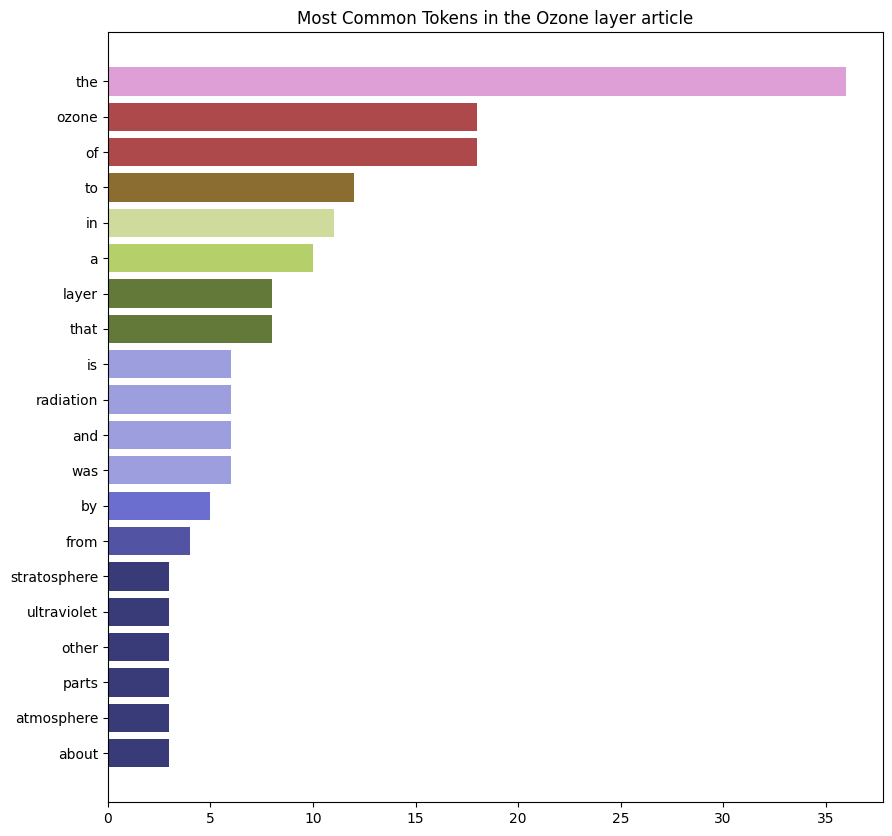

In [37]:
data = print_most_frequent(frequencies, 20)
words = list(data.keys())
val = list(data.values())
denominator = max(val) - min(val)
scaled_data = [((datum*1.4)-min(val))/denominator for datum in val]
colors = []
cmap = get_cmap('tab20b')
for decimal in scaled_data:
    colors.append(cmap(decimal))
plt.figure(figsize=(10, 10))
plt.barh(words, val, color=colors)
plt.title("Most Common Tokens in the Ozone layer article")
plt.gca().invert_yaxis()
plt.show()

In [38]:
articles = ['a', 'an', 'the']
prepositions = ['of', 'in', 'on', 'at', 'by', 'for', 'to', 'with', 'from', 'up', 'down', 'after', 'before', 'under', 'over', 'about', 'through']
pronouns = ['I', 'me', 'my', 'myself', 'we', 'our', 'ourselves', 'you', 'your', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'who', 'which', 'that', 'this', 'these', 'those']
auxiliary_verbs = ['am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing']
conjunctions = ['and', 'but', 'or', 'if', 'because', 'as', 'until', 'while']
other = ['not', 'no', 'yes', 'so', 'too', 'very', 'can', 'will', 'just', "don't", 'should', 'now']
stop_words = (articles + prepositions + pronouns + auxiliary_verbs + conjunctions + other)

In [39]:
def remove_stop_words(words, stop_words):
  filtered = []
  for word in words:
    if word not in stop_words:
      filtered.append(word)
  return filtered

filtered_collection = remove_stop_words(collection, stop_words)

filtered_collection


['ozone',
 'layer',
 'ozone',
 'shield',
 'region',
 "earth's",
 'stratosphere',
 'absorbs',
 'most',
 "sun's",
 'ultraviolet',
 '',
 'radiation',
 'contains',
 'high',
 'concentration',
 'ozone',
 'o3',
 'relation',
 'other',
 'parts',
 'atmosphere',
 'although',
 'still',
 'small',
 'relation',
 'other',
 'gases',
 'stratosphere',
 'ozone',
 'layer',
 'contains',
 'less',
 'than',
 '10',
 'parts',
 'per',
 'million',
 'ozone',
 'average',
 'ozone',
 'concentration',
 "earth's",
 'atmosphere',
 'whole',
 '0.3',
 'parts',
 'per',
 'million',
 'ozone',
 'layer',
 'mainly',
 'found',
 'lower',
 'portion',
 'stratosphere',
 'approximately',
 '15',
 '35',
 'kilometers',
 '9',
 '22',
 'mi',
 'above',
 'earth',
 'although',
 'thickness',
 'varies',
 'seasonally',
 'geographically.the',
 'ozone',
 'layer',
 'discovered',
 '1913',
 'french',
 'physicists',
 'charles',
 'fabry',
 'henri',
 'buisson',
 'measurements',
 'sun',
 'showed',
 'radiation',
 'sent',
 'out',
 'surface',
 'reaching',
 'g

<ipython-input-40-b8fabc18cce0>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('tab20b')


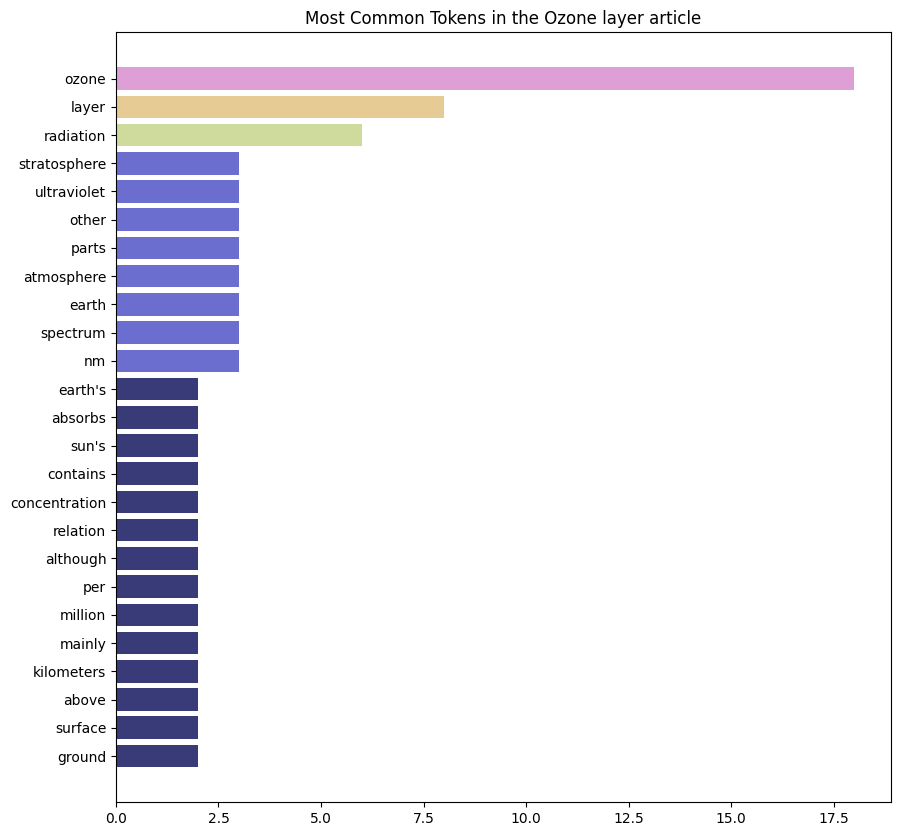

In [40]:
def last_task(filtered_words):
  freq = count_frequency(filtered_words)
  data = print_most_frequent(freq, 25)
  words = list(data.keys())
  val = list(data.values())
  denominator = max(val) - min(val)
  scaled_data = [((datum*1.4)-min(val))/denominator for datum in val]
  colors = []
  cmap = get_cmap('tab20b')
  for decimal in scaled_data:
      colors.append(cmap(decimal))
  plt.figure(figsize=(10, 10))
  plt.barh(words, val, color=colors)
  plt.title("Most Common Tokens in the Ozone layer article")
  plt.gca().invert_yaxis()
  plt.show()

last_task(filtered_collection)